In [119]:
import numpy as np
import pandas as pd
import re
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime
import seaborn as sns
import os.path

In [20]:
# Program to get the names of all the json files in rawdata.

# Basepath of raw files.
basepath = "files/rawdata/"

files = os.listdir(path = basepath)
files

['controversialposts.json',
 'newposts.json',
 'oldposts.json',
 'popularposts.json']

In [94]:
controversiallist = []
popularlist = []
oldpostslist = []
newpostslist = []
    
for filename in files:    
    file = basepath + filename
    
    with open(file, encoding="utf8") as json_file:
        json_text = json.load(json_file)

    if filename[:-5] == "controversialposts":
        for i in range(0,len(json_text['Title'])):
            tempdict = {}
            tempdict['Post'] = json_text['Title'][i]['name'].replace('"', '').replace("'", '').replace(',', '')
            tempdict['Votes'] = json_text['Votes'][i]['name'].replace('points', '').replace('point', '').replace(',', '')
            tempdict['Date'] = datetime.strptime(json_text['Date'][i]['name'][:10], "%Y-%m-%d")
            tempdict['Comments'] = json_text['Comments'][i]['name'].replace('comments', '').replace('comment', '').replace(',', '')
            controversiallist.append(tempdict)

    elif filename[:-5] == "popularposts":
        for i in range(0,len(json_text['Title'])):
            tempdict = {}
            tempdict['Post'] = json_text['Title'][i]['name'].replace('"', '').replace("'", '').replace(',', '')
            tempdict['Votes'] = json_text['Votes'][i]['name'].replace('points', '').replace('point', '').replace(',', '')
            tempdict['Date'] = datetime.strptime(json_text['Date'][i]['Time'][:10], "%Y-%m-%d")
            tempdict['Comments'] = json_text['Comments'][i]['name'].replace('comments', '').replace('comment', '').replace(',', '')
            popularlist.append(tempdict)
            

    elif filename[:-5] == "newposts":
        for i in range(0,len(json_text['Post'])):
            tempdict = {}
            tempdict['Post'] = json_text['Post'][i]['name'].replace('"', '').replace("'", '').replace(',', '')
            tempdict['Votes'] = json_text['Votes'][i]['name'].replace('k', '').replace(',' , '')
            tempdict['Date'] = datetime.strptime(json_text['Time'][i]['Time'][:10], "%Y-%m-%d")
            tempdict['Comments'] = json_text['Comments'][i]['name'].replace('comments', '').replace('comment', '').replace(',', '')
            newpostslist.append(tempdict)


    elif filename[:-5] == "oldposts":
        for i in range(0,len(json_text['Ttile'])):
            tempdict = {}
            tempdict['Post'] = json_text['Ttile'][i]['name'].replace('"', '').replace("'", '').replace(',', '')
            tempdict['Votes'] = json_text['Votes'][i]['Score'].replace('points', '').replace('point', '').replace(',', '')
            tempdict['Date'] = datetime.strptime(json_text['Date'][i]['Time'][:10], "%Y-%m-%d")
            tempdict['Comments'] = json_text['Comments'][i]['name'].replace('comments', '').replace('comment', '').replace(',', '')
            oldpostslist.append(tempdict)
            

In [103]:
controdf = pd.DataFrame(controversiallist)

popdf = pd.DataFrame(popularlist)

olddf = pd.DataFrame(oldpostslist)

newdf = pd.DataFrame(newpostslist)

In [104]:
controdf.head()

,Post,Votes,Date,Comments
0,Only 9% of Britons want life to return to norm...,92256,2020-04-17,5966
1,Shoot them dead: Philippine President Rodrigo ...,32001,2020-04-02,3452
2,COVID-19 lockdown: New Zealand Health Minister...,29256,2020-04-06,2084
3,New report finds over 1300 private jets have f...,60011,2020-04-20,886
4,New Zealand reports only 8 new COVID 19 cases ...,60683,2020-04-17,1193


In [105]:
popdf.head()

,Post,Votes,Date,Comments
0,Even if COVID-19 is unavoidable delaying infec...,128721,2020-03-10,4416
1,Gino Fasoli was 73 years old. He was italian a...,118808,2020-03-22,1855
2,How to stop a virus from spreading,105662,2020-03-22,2219
3,All 11 Coronavirus patients in Greenland have ...,6,2020-04-08,2334
4,An Italian hospital ran out of ICU valves. A l...,101981,2020-03-16,1422


In [106]:
olddf.head()

,Post,Votes,Date,Comments
0,A major Chinese cyberattack on American compan...,987,2020-03-27,46
1,Lecturer stranded in China coronavirus lockdown,9,2020-01-26,7
2,Silver linings: China air improves after coron...,2,2020-04-22,2
3,Silver linings: China air improves after coron...,1,2020-04-22,1
4,China economy has worst quarter in 40 years af...,28,2020-04-17,8


In [107]:
newdf.head()

,Post,Votes,Date,Comments
0,Even if COVID-19 is unavoidable delaying infec...,88800,2020-03-24,4416
1,Gino Fasoli was 73 years old. He was italian a...,85800,2020-03-26,1853
2,How to stop a virus from spreading,83900,2020-03-06,2220
3,All 11 Coronavirus patients in Greenland have ...,83000,2020-03-31,2330
4,An Italian hospital ran out of ICU valves. A l...,56500,2020-03-27,1422


In [108]:
controversial_merged = controdf['Date'].value_counts().rename_axis('date').reset_index(name='CTotalPosts')
popular_merged = popdf['Date'].value_counts().rename_axis('date').reset_index(name='PTotalPosts')
old_merged = olddf['Date'].value_counts().rename_axis('date').reset_index(name='OTotalPosts')
new_merged = newdf['Date'].value_counts().rename_axis('date').reset_index(name='NTotalPosts')

In [115]:
merged_df = pd.merge(old_merged, popular_merged, on='date', how='outer')
merged_df = pd.merge(merged_df, controversial_merged, on='date', how='outer')
merged_df = pd.merge(merged_df, new_merged, on='date', how='outer')
merged_df.fillna(0, inplace=True)

In [116]:
merged_df.head()

,date,OTotalPosts,PTotalPosts,CTotalPosts,NTotalPosts
0,2020-04-08,6.0,58.0,10.0,26.0
1,2020-01-23,5.0,0.0,2.0,0.0
2,2020-04-22,4.0,26.0,17.0,15.0
3,2020-02-18,4.0,0.0,2.0,0.0
4,2020-04-05,4.0,46.0,17.0,21.0


In [146]:
merged_df = merged_df.T
merged_df.sort_values(by = ['date'], inplace=True, ascending=True, axis=0)


KeyError: 'date'

Text(0.5, 0, 'Log[Number Of Mentions](Cumulative)')

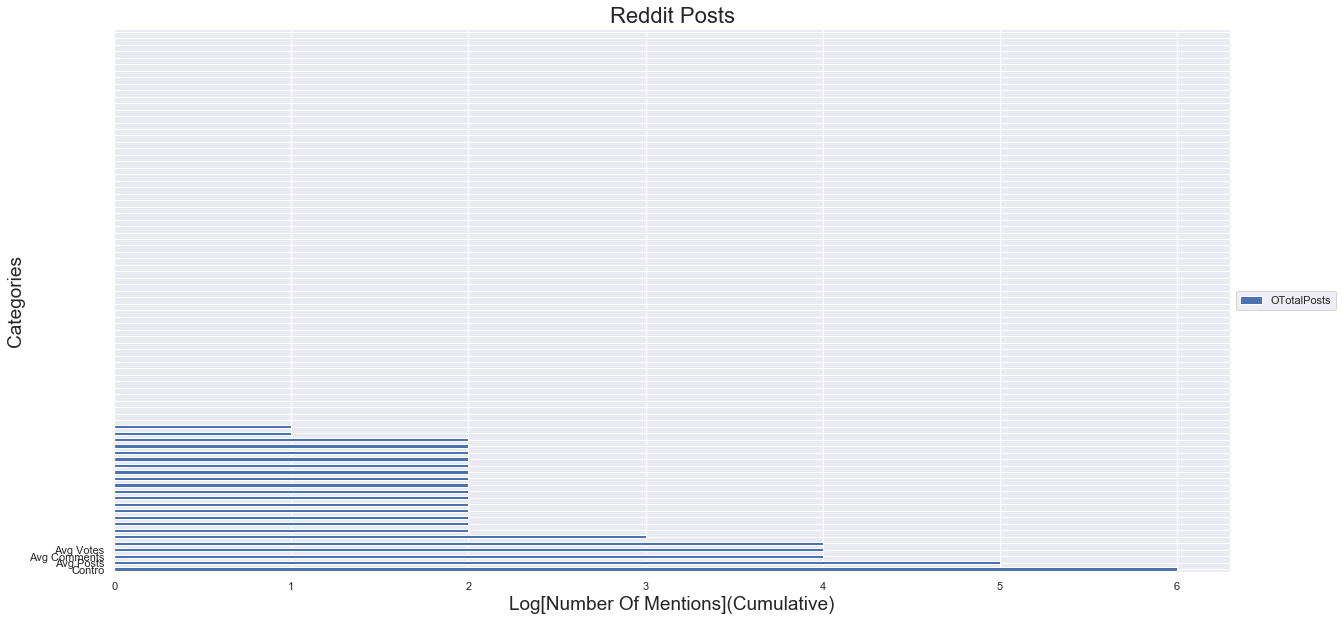

In [123]:
# comparing all posts data
sns.set()
fig, ax = plt.subplots(1, figsize=(20, 10))
merged_df.iloc[1,:].plot.barh(ax=ax)
ax = plt.gca()
ax.set_yticklabels(['Contro', 'Avg Posts', 'Avg Comments', 'Avg Votes'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Reddit Posts', fontsize=22)
plt.ylabel('Categories', fontsize=19)
plt.xlabel('Log[Number Of Mentions](Cumulative)', fontsize=19)

In [131]:
reddit_cumsum = np.cumsum(merged_df.iloc[:,1:5])
reddit_cumsum.head(10)

,OTotalPosts,PTotalPosts,CTotalPosts,NTotalPosts
0,6,58,10,26
1,11,58,12,26
2,15,84,29,41
3,19,84,31,41
4,23,130,48,62
5,26,130,52,62
6,28,130,52,62
7,30,178,58,98
8,32,178,59,98
9,34,258,70,125


In [135]:
date_list = pd.read_csv(r"C:/Users/Hitesh/Downloads/date_list.csv")
date_list.head()

,Date
0,22/01/2020
1,23/01/2020
2,24/01/2020
3,25/01/2020
4,26/01/2020


In [136]:
date_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    83 non-null     object
dtypes: object(1)
memory usage: 792.0+ bytes


In [137]:
date_list = date_list.loc[date_list.Date <= '2020-04-13']
date_list.reset_index(drop=True, inplace=True)
date_list.head()

,Date
0,01/02/2020
1,02/02/2020
2,03/02/2020
3,04/02/2020
4,05/02/2020


In [ ]:
date_list.to_csv('date_list.csv', encoding='utf-8', index=False)

In [ ]:
print(date_list.loc[date_list.Date == '2020-01-22'])
print(date_list.loc[date_list.Date == '2020-02-20'])
print(date_list.loc[date_list.Date == '2020-03-20'])
print(date_list.loc[date_list.Date == '2020-04-12'])

In [ ]:
date_list_test = date_list.iloc[[0, 29, 58, 81]]

In [ ]:
date_list_test.reset_index(drop=True, inplace=True)
date_list_test.head()

In [124]:
reddit = pd.read_csv("others/Reddit_Dataset_with_cumsum_log.csv", parse_dates=['Date'], dayfirst=True)
reddit.head()

FileNotFoundError: [Errno 2] File others/Reddit_Dataset_with_cumsum_log.csv does not exist: 'others/Reddit_Dataset_with_cumsum_log.csv'

In [125]:
reddit.info()


NameError: name 'reddit' is not defined

In [126]:
reddit.columns

NameError: name 'reddit' is not defined

In [128]:
reddit.set_index('Date', inplace=True)
reddit.head()

NameError: name 'reddit' is not defined

In [ ]:
reddit.rename(columns = {'Contro_Posts':'Contro Posts',
 'Avg _comments':'Avg Comments/Post',
 'Avg_votes':'Avg Votes/Post',
 'Avg_posts':'Avg Posts/Day' 
 }, 
 inplace = True)

In [ ]:
reddit_stacked = pd.DataFrame(reddit.stack(dropna=False))
reddit_stacked.head()

In [ ]:
reddit_stacked.reset_index(inplace=True)
reddit_stacked.info()

In [ ]:
reddit_stacked.columns

In [ ]:
reddit_stacked.rename(columns = {'level_1':'Categories',
 0:'log10_mentions'
 }, 
 inplace = True)
reddit_stacked.head()

In [ ]:
reddit_stacked.info()

In [ ]:
selected_date_reddit = reddit_stacked.loc[reddit_stacked.Date == '2020-04-13']
selected_date_reddit

In [ ]:
reddit_stacked.to_csv('REDDIT.csv', encoding='utf-8', index=False)

In [ ]:
sns.barplot(x="log10_mentions", y="Categories", data = selected_date_reddit);